## 1. Data load and cleansing

In [2]:
# loading libraries and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## loading data and selecting the necessary columns
cols = {} # column names
cols["epworth"] = ["EpworthSleepinessScale.Required Fields.GUID", "EpworthSleepinessScale.Required Fields.VisitTypPDBP", "EpworthSleepinessScale.ESS.ESS_SittingReading", "EpworthSleepinessScale.ESS.ESS_WatchingTV", "EpworthSleepinessScale.ESS.ESS_SittingInactive", "EpworthSleepinessScale.ESS.ESS_PassengerInCar", "EpworthSleepinessScale.ESS.ESS_LyingDownToRest", "EpworthSleepinessScale.ESS.ESS_SittingTalking", "EpworthSleepinessScale.ESS.ESS_SittingLunchNoAlc", "EpworthSleepinessScale.ESS.ESS_DozingInTraffc", "EpworthSleepinessScale.ESS.ESS_TotalScore"]
cols["HDRS"] = ["HDRS.Required Fields.VisitTypPDBP", "HDRS.Required Fields.GUID", "HDRS.HDRS.HDRSDeprsdMdInd", "HDRS.HDRS.HDRSGltMndInd", "HDRS.HDRS.HDRSucdInd", "HDRS.HDRS.HDRSErlyNgtInsmnInd", "HDRS.HDRS.HDRSMddlNgtInsmnInd", "HDRS.HDRS.HDRSErlyMornInsmnInd", "HDRS.HDRS.HDRSWrkActDifcltInd", "HDRS.HDRS.HDRSRetrdtnInd", "HDRS.HDRS.HDRSAgttnInd", "HDRS.HDRS.HDRSAnxPsycDifcltInd", "HDRS.HDRS.HDRSAnxSomtcInd", "HDRS.HDRS.HDRSSomtcSymptmInd", "HDRS.HDRS.HDRSGenrlSomtcSymptmInd", "HDRS.HDRS.HDRSGentlSymptmInd", "HDRS.HDRS.HDRSHypchdssInd", "HDRS.HDRS.HDRSWgtLosPatInd", "HDRS.HDRS.HDRSWgtLosMeasrInd", "HDRS.HDRS.HDRSInsgtInd", "HDRS.HDRS.HDRSTotScore"]
cols["updrs"] = ["MDS_UPDRS.Required Fields.VisitTypPDBP", "MDS_UPDRS.Required Fields.GUID", "MDS_UPDRS.Part I: nM-EDL.MDSUPDRSRcntCogImprmntScore", "MDS_UPDRS.Part I: nM-EDL.MDSUPDRSHallucPsychosScore", "MDS_UPDRS.Part I: nM-EDL.MDSUPDRSDrpssMoodScore", "MDS_UPDRS.Part I: nM-EDL.MDSUPDRSAnxsMoodScore", "MDS_UPDRS.Part I: nM-EDL.MDSUPDRSApathyScore", "MDS_UPDRS.Part I: nM-EDL.MDSUPDRSDopmnDysregSyndScore", "MDS_UPDRS.Part I: nM-EDL.MDSUPDRSQstnnreInfoProvdrTyp", "MDS_UPDRS.Part I: nM-EDL.MDSUPDRSSleepProbScore", "MDS_UPDRS.Part I: nM-EDL.MDSUPDRSDaytmSleepScore", "MDS_UPDRS.Part I: nM-EDL.MDSUPDRSPainOthrSensScore", "MDS_UPDRS.Part I: nM-EDL.MDSUPDRSUrnryProbScore", "MDS_UPDRS.Part I: nM-EDL.MDSUPDRSConstipProbScore", "MDS_UPDRS.Part I: nM-EDL.MDSUPDRSLiteHeadStndngScore", "MDS_UPDRS.Part I: nM-EDL.MDSUPDRSFatigueScore", "MDS_UPDRS.Part I: nM-EDL.MDSUPDRS_PartIScore", "MDS_UPDRS.Part II: M-EDL.MDSUPDRSSpeechScore", "MDS_UPDRS.Part II: M-EDL.MDSUPDRSSlivaDroolScore", "MDS_UPDRS.Part II: M-EDL.MDSUPDRSChwngSwllwngScore", "MDS_UPDRS.Part II: M-EDL.MDSUPDRSEatingTskScore", "MDS_UPDRS.Part II: M-EDL.MDSUPDRSDressingScore", "MDS_UPDRS.Part II: M-EDL.MDSUPDRSHygieneScore", "MDS_UPDRS.Part II: M-EDL.MDSUPDRSHandwritingScore", "MDS_UPDRS.Part II: M-EDL.MDSUPDRSHobbieOthrActScore", "MDS_UPDRS.Part II: M-EDL.MDSUPDRSTurngBedScore", "MDS_UPDRS.Part II: M-EDL.MDSUPDRSTremorScore", "MDS_UPDRS.Part II: M-EDL.MDSUPDRSGttngOutBedScore", "MDS_UPDRS.Part II: M-EDL.MDSUPDRSWlkngBalanceScore", "MDS_UPDRS.Part II: M-EDL.MDSUPDRSFreezingScore", "MDS_UPDRS.Part II: M-EDL.MDSUPDRS_PartIIScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSPtntPrknsnMedInd", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSPtClinStatePrknsnMdInd", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSPtntUseLDOPAInd", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSLstLDOPADoseTm", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSFreeFlowSpeechScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSFacialExprScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSNeckRigidScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSRUERigidScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSLUERigidScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSRLERigidScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSLLERigidScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSFingerTppngRteHndScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSFingerTppngLftHndScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSRteHndScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSLftHndScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSProntSupnRtHndMvmtScr", "MDS_UPDRS.Part III: Motor Examination.PronatSupinLftHndMvmntScore", "MDS_UPDRS.Part III: Motor Examination.RteFtToeTppngScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSLftFtToeTppngScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSLegAgiltyRteLegScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSLegAgiltyLftLegScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSArisingFrmChrScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSGaitScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSFreezingGaitScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSPostrlStabltyScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSPostureScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSGlblSpontntyMvmntScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSPostrlTremorRtHndScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSPostrlTremrLftHndScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSKineticTremrRtHndScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSKineticTremrLftHndScr", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSRestTremorAmpRUEScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSRestTremorAmpLUEScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSRestTremorAmpRLEScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSRestTremorAmpLLEScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSRestTremrAmpLipJawScr", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSConstncyRestTremrScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSDyskChreaDystnaPrsScr", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSMvmntIntrfrnceScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRSHoehnYahrStageScore", "MDS_UPDRS.Part III: Motor Examination.MDSUPDRS_PartIIIScore", "MDS_UPDRS.Part IV: Motor Complications.MDSUPDRSTmSpntDyskScore", "MDS_UPDRS.Part IV: Motor Complications.MDSUPDRSTtlHrAwkDyskNum", "MDS_UPDRS.Part IV: Motor Complications.MDSUPDRSTtlHrDyskNum", "MDS_UPDRS.Part IV: Motor Complications.MDSUPDRSPrcntDyskVal", "MDS_UPDRS.Part IV: Motor Complications.MDSUPDRSFuncImpactDyskScore", "MDS_UPDRS.Part IV: Motor Complications.MDSUPDRSTtlHrAwkOffStateNum", "MDS_UPDRS.Part IV: Motor Complications.MDSUPDRSTtlHrOffNum", "MDS_UPDRS.Part IV: Motor Complications.MDSUPDRSPrcntOffVal", "MDS_UPDRS.Part IV: Motor Complications.MDSUPDRSTmSpntOffStateScore", "MDS_UPDRS.Part IV: Motor Complications.MDSUPDRSFuncImpactFluctScore", "MDS_UPDRS.Part IV: Motor Complications.MDSUPDRSComplxtyMtrFluctScore", "MDS_UPDRS.Part IV: Motor Complications.MDSUPDRSPainflOffStatDystnaScr", "MDS_UPDRS.Part IV: Motor Complications.MDSUPDRSTtlHrOffDemnDystniaNum", "MDS_UPDRS.Part IV: Motor Complications.MDSUPDRSTtlHrOffWDystniaNum", "MDS_UPDRS.Part IV: Motor Complications.MDSUPDRSPrcntOffDystniaVal", "MDS_UPDRS.Part IV: Motor Complications.MDSUPDRS_PartIVScore", "MDS_UPDRS.Total Score.MDSUPDRS_TotalScore"]
cols["moca"] = ["MoCA.Required Fields.VisitTypPDBP", "MoCA.Required Fields.GUID", "MoCA.MoCA.MOCA_VisuospatialExec", "MoCA.MoCA.MOCA_Naming", "MoCA.MoCA.MOCA_Digits", "MoCA.MoCA.MOCA_Letters", "MoCA.MoCA.MOCA_Serial7", "MoCA.MoCA.MOCA_LangRepeat", "MoCA.MoCA.MOCA_LangFluency", "MoCA.MoCA.MOCA_Abstraction", "MoCA.MoCA.MOCA_DelydRecall", "MoCA.MoCA.MOCA_DelydRecallOptnlCatCue", "MoCA.MoCA.MOCA_DelydRecalOptnlMultChoice", "MoCA.MoCA.MOCA_Orient", "MoCA.MoCA.MOCA_ImageResponse", "MoCA.MoCA.MOCA_EduInd", "MoCA.MoCA.MOCA_Total"]
cols["schwab"] = ["ModSchwabAndEnglandScale.Required Fields.VisitTypPDBP", "ModSchwabAndEnglandScale.Required Fields.GUID", "ModSchwabAndEnglandScale.Scale Score.UPDRStScaleSchEngDalLivScl"]
# cols["pdq39"] = ["PDQ39.Required Fields.VisitTypPDBP", "PDQ39.Required Fields.GUID", "PDQ39.PDQ-39.PDQ_39_Leisure", "PDQ39.PDQ-39.PDQ_39_Housework", "PDQ39.PDQ-39.PDQ_39_GroceryBags", "PDQ39.PDQ-39.PDQ_39_WalkingHalfMile", "PDQ39.PDQ-39.PDQ_39_WalkingBlock", "PDQ39.PDQ-39.PDQ_39_House", "PDQ39.PDQ-39.PDQ_39_PublicPlaces", "PDQ39.PDQ-39.PDQ_39_Outside", "PDQ39.PDQ-39.PDQ_39_Falling", "PDQ39.PDQ-39.PDQ_39_Confined", "PDQ39.PDQ-39.PDQ_39_Showering", "PDQ39.PDQ-39.PDQ_39_Dressing", "PDQ39.PDQ-39.PDQ_39_Buttons", "PDQ39.PDQ-39.PDQ_39_Writing", "PDQ39.PDQ-39.PDQ_39_CuttingFood", "PDQ39.PDQ-39.PDQ_39_HoldingDrink", "PDQ39.PDQ-39.PDQ_39_Depressed", "PDQ39.PDQ-39.PDQ_39_Lonely", "PDQ39.PDQ-39.PDQ_39_Tearful", "PDQ39.PDQ-39.PDQ_39_Angry", "PDQ39.PDQ-39.PDQ_39_Anxious", "PDQ39.PDQ-39.PDQ_39_Worried", "PDQ39.PDQ-39.PDQ_39_HidePD", "PDQ39.PDQ-39.PDQ_39_EatingPublic", "PDQ39.PDQ-39.PDQ_39_EmbarrassedPublic", "PDQ39.PDQ-39.PDQ_39_WorriedReaction", "PDQ39.PDQ-39.PDQ_39_Relationships", "PDQ39.PDQ-39.PDQ_39_LackOfSuprtPrtnr", "PDQ39.PDQ-39.PDQ_39_LackOfSuprtFmly", "PDQ39.PDQ-39.PDQ_39_UnexpctdSleep", "PDQ39.PDQ-39.PDQ_39_Concentration", "PDQ39.PDQ-39.PDQ_39_Memory", "PDQ39.PDQ-39.PDQ_39_Dreams", "PDQ39.PDQ-39.PDQ_39_Speaking", "PDQ39.PDQ-39.PDQ_39_Communicate", "PDQ39.PDQ-39.PDQ_39_Ignored", "PDQ39.PDQ-39.PDQ_39_CrampsSpasms", "PDQ39.PDQ-39.PDQ_39_AchesPains", "PDQ39.PDQ-39.PDQ_39_HotCold", "PDQ39.Scale Scores.PDQ_39_TotalScore_Mobility", "PDQ39.Scale Scores.PDQ_39_TotalScore_ADL", "PDQ39.Scale Scores.PDQ_39_TotalScore_Emotional", "PDQ39.Scale Scores.PDQ_39_TotalScore_Stigma", "PDQ39.Scale Scores.PDQ_39_TotalScore_SocialSuprt", "PDQ39.Scale Scores.PDQ_39_TotalScore_CogImpairmnt", "PDQ39.Scale Scores.PDQ_39_TotalScore_Communcation", "PDQ39.Scale Scores.PDQ_39_TotalScore_BodDiscomfrt"]
cols["pdq39"] = ["PDQ39.Required Fields.VisitTypPDBP", "PDQ39.Required Fields.GUID", "PDQ39.Scale Scores.PDQ_39_TotalScore_Mobility", "PDQ39.Scale Scores.PDQ_39_TotalScore_ADL", "PDQ39.Scale Scores.PDQ_39_TotalScore_Emotional", "PDQ39.Scale Scores.PDQ_39_TotalScore_Stigma", "PDQ39.Scale Scores.PDQ_39_TotalScore_SocialSuprt", "PDQ39.Scale Scores.PDQ_39_TotalScore_CogImpairmnt", "PDQ39.Scale Scores.PDQ_39_TotalScore_Communcation", "PDQ39.Scale Scores.PDQ_39_TotalScore_BodDiscomfrt"]
cols["upsit"] = ["UnivOfPennSmellIdenTest.Required Fields.VisitTypPDBP", "UnivOfPennSmellIdenTest.Required Fields.GUID", "UnivOfPennSmellIdenTest.UPSIT.UPennSITTotal"]
cols["demographics"] = ["Demographics.Required Fields.GUID", "Demographics.Required Fields.AgeYrs", "Demographics.Demographics.GenderTypPDBP"]
cols["biosample"] = ["BiosampleCatalogV5.Subject Information.GUID", "BiosampleCatalogV5.Subject Information.InclusnXclusnCntrlInd"]
cols["family_history_col"] = ["FamilyHistory.Required Fields.GUID", "FamilyHistory.Parkinson's disease.FamHistMedclCondInd"]

## data load
epworth = pd.read_csv("../PDBP replication/BL-102616-All_2016-10-26T15-05-47/query_result_EpworthSleepinessScale_2016-10-26T15-04-51.csv", usecols=cols["epworth"])
epworth = epworth.rename(columns={col: col.split('.')[-1] for col in epworth.columns})
epworth = epworth.rename(columns={'VisitTypPDBP':'EVENT_ID', 'GUID':'PATNO'})

HDRS = pd.read_csv("../PDBP replication/BL-102616-All_2016-10-26T15-05-47/query_result_HDRS_2016-10-26T15-05-06.csv", usecols=cols["HDRS"])
HDRS = HDRS.rename(columns={col: col.split('.')[-1] for col in HDRS.columns})
HDRS = HDRS.rename(columns={'VisitTypPDBP':'EVENT_ID', 'GUID':'PATNO'})

updrs = pd.read_csv("../PDBP replication/BL-102616-All_2016-10-26T15-05-47/query_result_MDS_UPDRS_2016-10-26T15-03-45.csv", usecols=cols["updrs"])
updrs = updrs.rename(columns={col: col.split('.')[-1] for col in updrs.columns})
updrs = updrs.rename(columns={'VisitTypPDBP':'EVENT_ID', 'GUID':'PATNO'})

moca = pd.read_csv("../PDBP replication/BL-102616-All_2016-10-26T15-05-47/query_result_MoCA_2016-10-26T15-02-40.csv", usecols=cols["moca"])
moca = moca.rename(columns={col: col.split('.')[-1] for col in moca.columns})
moca = moca.rename(columns={'VisitTypPDBP':'EVENT_ID', 'GUID':'PATNO'})

schwab = pd.read_csv("../PDBP replication/BL-102616-All_2016-10-26T15-05-47/query_result_ModSchwabAndEnglandScale_2016-10-26T15-03-17.csv", usecols=cols["schwab"])
schwab = schwab.rename(columns={col: col.split('.')[-1] for col in schwab.columns})
schwab = schwab.rename(columns={'VisitTypPDBP':'EVENT_ID', 'GUID':'PATNO'})

pdq39 = pd.read_csv("../PDBP replication/BL-102616-All_2016-10-26T15-05-47/query_result_PDQ39_2016-10-26T15-04-27.csv", usecols=cols["pdq39"])
pdq39 = pdq39.rename(columns={col: col.split('.')[-1] for col in pdq39.columns})
pdq39 = pdq39.rename(columns={'VisitTypPDBP':'EVENT_ID', 'GUID':'PATNO'})

upsit = pd.read_csv("../PDBP replication/BL-102616-All_2016-10-26T15-05-47/query_result_UnivOfPennSmellIdenTest_2016-10-26T15-02-28.csv", usecols=cols["upsit"])
upsit = upsit.rename(columns={col: col.split('.')[-1] for col in upsit.columns})
upsit = upsit.rename(columns={'VisitTypPDBP':'EVENT_ID', 'GUID':'PATNO'})

# Patient info
demographics = pd.read_csv("../PDBP replication/BL-102616-All_2016-10-26T15-05-47/query_result_Demographics_2016-10-26T15-03-58.csv", usecols=cols["demographics"])
demographics = demographics.rename(columns={col: col.split('.')[-1] for col in demographics.columns})
demographics = demographics.rename(columns={'GUID':'PATNO', 'AgeYrs':'Age', 'GenderTypPDBP':'Gender'})
demographics = demographics.drop_duplicates(subset='PATNO', keep='last')

pdbp_info = demographics

biosample = pd.read_csv("../PDBP replication/BL-102616-All_2016-10-26T15-05-47/query_result_BiosampleCatalogV5_2016-10-26T15-05-05.csv", usecols=cols["biosample"])
biosample = biosample.rename(columns={col: col.split('.')[-1] for col in biosample.columns})
biosample = biosample.rename(columns={'GUID':'PATNO', 'InclusnXclusnCntrlInd':'CASE'})
biosample = biosample.drop_duplicates(subset='PATNO', keep='last')

pdbp_info = pd.concat([pdbp_info.set_index('PATNO'), biosample.set_index('PATNO')], axis=1, join='inner')

family_history_pd = pd.read_csv("../PDBP replication/BL-102616-All_2016-10-26T15-05-47/query_result_FamilyHistory_2016-10-26T15-05-18.csv", usecols=cols["family_history_col"])
family_history_pd = family_history_pd.rename(columns={col: col.split('.')[-1] for col in family_history_pd.columns})
family_history_pd = family_history_pd.rename(columns={'GUID':'PATNO'})
family_history_pd = family_history_pd.dropna(axis=0).drop_duplicates(subset='PATNO', keep='last')

## 2. Explore data

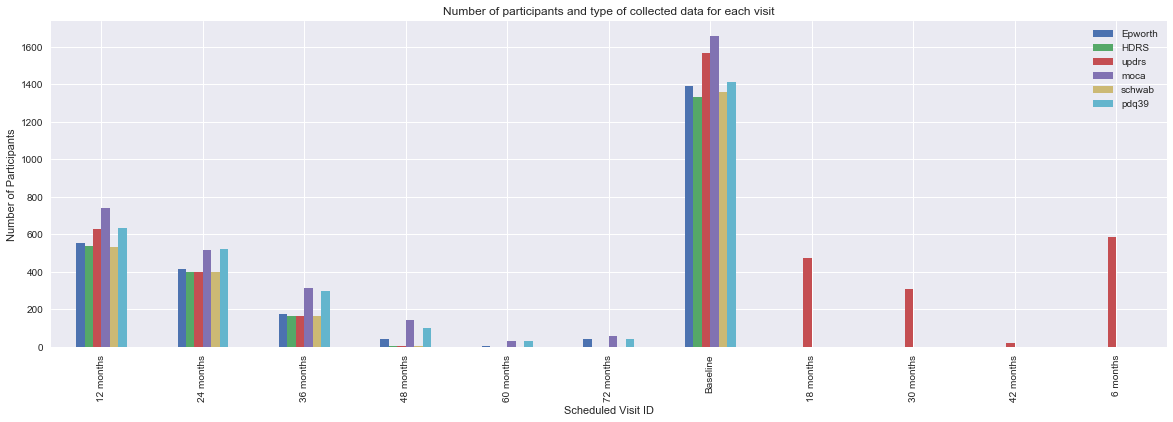

In [4]:
a = epworth.reset_index().groupby('EVENT_ID').size().reset_index().rename(columns={0:'Epworth'})
b = HDRS.reset_index().groupby('EVENT_ID').size().reset_index().rename(columns={0:'HDRS'})
c = updrs.reset_index().groupby('EVENT_ID').size().reset_index().rename(columns={0:'updrs'})
d = moca.reset_index().groupby('EVENT_ID').size().reset_index().rename(columns={0:'moca'})
e = schwab.reset_index().groupby('EVENT_ID').size().reset_index().rename(columns={0:'schwab'})
f = pdq39.reset_index().groupby('EVENT_ID').size().reset_index().rename(columns={0:'pdq39'})
g = upsit.reset_index().groupby('EVENT_ID').size().reset_index().rename(columns={0:'upsit'})

plot = a.merge(b, on='EVENT_ID', how='outer').merge(c, on='EVENT_ID', how='outer').merge(d, on='EVENT_ID', how='outer').merge(e, on='EVENT_ID', how='outer').merge(f, on='EVENT_ID', how='outer').set_index('EVENT_ID').plot(kind='bar', title="Number of participants and type of collected data for each visit", figsize=(20, 6))
plot.set_ylabel("Number of Participants");
plot.set_xlabel("Scheduled Visit ID");

### 2.1. Selecct the ones in the study for 36 months

In [5]:
# datasets and visits of interest, limiting the progression to 36 months (visit 06)
datasets_of_interest = ['epworth', 'HDRS', 'updrs', 'moca', 'schwab', 'pdq39', 'upsit']
visits_of_interest = ['Baseline', '12 months', '24 months', '36 months']#, 'V08']#, 'V09', 'V10', 'V11', 'V12'] #'V01', 'V05', 'V07'
last_visit = visits_of_interest[-1]

# selecting participants with data from BL to last_visit
dataset_first_noindx = eval(datasets_of_interest[0]).reset_index()
patno_filtered_visited = dataset_first_noindx[ dataset_first_noindx.EVENT_ID == last_visit ]['PATNO']

for dataset in datasets_of_interest[1:]:
    dataset_noindx = eval(dataset).reset_index()
    temp_patno = dataset_noindx[ dataset_noindx.EVENT_ID == last_visit ]['PATNO']
    
    patno_filtered_visited = patno_filtered_visited[ patno_filtered_visited.isin(temp_patno) ]

# constructing the data_visits dictionary with all the information
data_visits = {}
# status_o = status[status.index.isin(patno_filtered_visited)].ENROLL_CAT
# screening_o = screening[screening.index.isin(patno_filtered_visited)]
data_visits["info"] = pdbp_info[pdbp_info.index.isin(patno_filtered_visited)]

for dataset in datasets_of_interest:    
    dataset_noindx = eval(dataset).reset_index()
    data_visits[dataset] = dataset_noindx[ dataset_noindx['PATNO'].isin(patno_filtered_visited) & dataset_noindx['EVENT_ID'].isin(visits_of_interest) ]

Visualizing selected cohort:

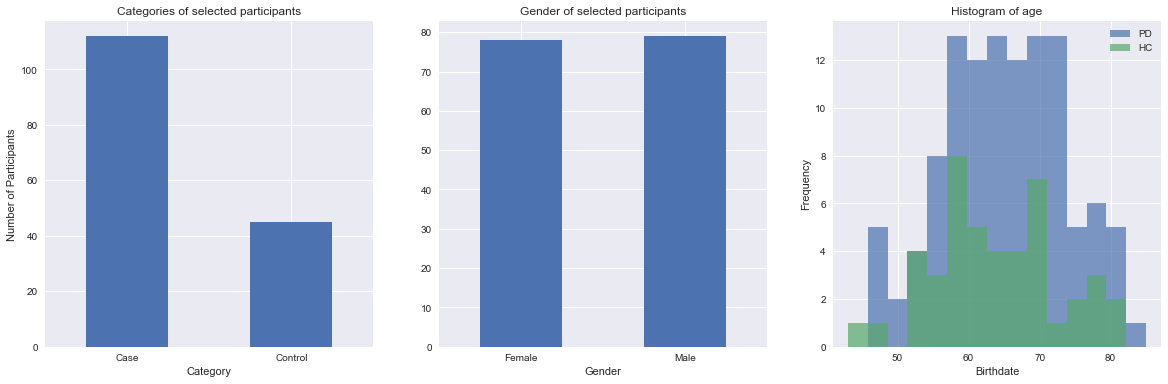

In [6]:
plt.figure(1, figsize=(20, 6))

# plot the categories distribution
plt.subplot(1,3,1)
plot_1 = data_visits["info"].CASE.reset_index().groupby("CASE").size().plot(kind='bar', title="Categories of selected participants", rot=0, ax=plt.gca())
plot_1.set_ylabel("Number of Participants"); plot_1.set_xlabel("Category");

# plot the gender distribution
plt.subplot(1,3,2)
data_visits["info"].Gender.reset_index().groupby("Gender").size().plot(kind='bar', title="Gender of selected participants", rot=0, ax=plt.gca());

# plot the age histogram
plt.subplot(1,3,3)
hc_birthdt = data_visits["info"].Age.reset_index()[data_visits["info"].reset_index()['CASE'] == 'Control'].rename(columns={'Age':'HC'})
pd_birthdt = data_visits["info"].Age.reset_index()[data_visits["info"].reset_index()['CASE'] == 'Case'].rename(columns={'Age':'PD'})
concat_birthdt = pd.concat([pd_birthdt.PD, hc_birthdt.HC], axis=1)
plot_3 = concat_birthdt.plot(kind='hist', title="Histogram of age", alpha=0.7, bins=15, ax=plt.gca())
plot_3.set_xlabel("Birthdate");


### 2.2. Stats for Table 1 paper

In [7]:
data_visits["info"].CASE.reset_index().groupby("CASE").size()

CASE
Case       112
Control     45
dtype: int64

In [8]:
data_visits["info"].Gender.reset_index()[data_visits["info"].reset_index()['CASE'] == 'Control'].reset_index().groupby("Gender").size()

Gender
Female    25
Male      20
dtype: int64

In [9]:
data_visits["info"].Age.reset_index()[data_visits["info"].reset_index()['CASE'] == 'Control'].set_index(["PATNO"]).describe()

Age
count  45.000000
mean   63.711111
std     9.114480
min    43.000000
25%    57.000000
50%    63.000000
75%    69.000000
max    82.000000

In [10]:
list_case_control = data_visits["info"].reset_index().PATNO[data_visits["info"].reset_index()['CASE'] == 'Control']

selected_family_history_pd = family_history_pd.set_index(['PATNO']).loc[list_case_control]
selected_family_history_pd[selected_family_history_pd.FamHistMedclCondInd.isin(['Yes'])].count()

FamHistMedclCondInd    12
dtype: int64

## 3. Vectorizing time-series data into one series

In [11]:
t1 = data_visits["epworth"].drop(['index'],axis=1).set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t2 = data_visits['HDRS'].drop(['index'],axis=1).set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t3 = data_visits['updrs'].drop(['index', 'MDSUPDRSLstLDOPADoseTm', 'MDSUPDRSPtntUseLDOPAInd', 'MDSUPDRSPtClinStatePrknsnMdInd', 'MDSUPDRSPtntPrknsnMedInd', 'MDSUPDRSDyskChreaDystnaPrsScr', 'MDSUPDRSTtlHrAwkDyskNum', 'MDSUPDRSMvmntIntrfrnceScore', 'MDSUPDRSPrcntOffVal', 'MDSUPDRSTtlHrOffNum', 'MDSUPDRSTtlHrAwkOffStateNum', 'MDSUPDRSPrcntDyskVal', 'MDSUPDRSTtlHrDyskNum', 'MDSUPDRSPrcntOffDystniaVal','MDSUPDRSTtlHrOffWDystniaNum','MDSUPDRSTtlHrOffDemnDystniaNum', 'MDSUPDRSQstnnreInfoProvdrTyp'],axis=1).set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t4 = data_visits['moca'].drop(['MOCA_DelydRecalOptnlMultChoice', 'MOCA_DelydRecallOptnlCatCue', 'MOCA_ImageResponse'], axis=1).set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t5 = data_visits['schwab'].drop(['index'],axis=1).set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t6 = data_visits['pdq39'].drop(['index'],axis=1).set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO')#.interpolate(method='linear', axis=1)
t7 = data_visits['upsit'].drop(['index'],axis=1).set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)

# plt.pcolor(t6.isnull())
M = pd.concat([t1, t2, t3, t4, t5, t6, t7], axis=1).interpolate(method='linear', axis=1, limit=10, limit_direction='both')

## 4. Normalization

In [12]:
# normalize values based on z-score
data_visits_zs = {}
for i in range(1, len(datasets_of_interest) + 1):
    dataset = 't' + str(i)
    dataset_columns = eval(dataset).columns.levels[0][0:-1]
    
    # create an empty dataframe: t16_zs = pd.DataFrame(index=t16.index, columns=t16.columns)
    data_visits_zs[dataset] = pd.DataFrame(index=eval(dataset).index, columns=eval(dataset).columns)
    
    for col in dataset_columns:
        # assign normalized: t16_zs['a_state'] = (t16['a_state'] - t16['a_state'].mean().mean()) / t16['a_state'].stack().std()
        data_visits_zs[dataset][col] = (eval(dataset)[col] - eval(dataset)[col].mean().mean()) / eval(dataset)[col].stack().std()

data_visits_zs['t7']

# construct full M
M_zs = pd.concat([data_visits_zs['t1'], data_visits_zs['t2'], data_visits_zs['t3'], data_visits_zs['t4'], 
                  data_visits_zs['t5'], data_visits_zs['t6'] , data_visits_zs['t7']], axis=1).interpolate(method='linear', axis=1, limit=10, limit_direction='both')

In [13]:
# normalize values based on min-max
data_visits_minmax = {}
minmax_min = {}
minmax_max = {}
for i in range(1, len(datasets_of_interest) + 1):
    dataset = 't' + str(i)
    dataset_columns = eval(dataset).columns.levels[0][0:-1]
    
    # create an empty dataframe: t16_zs = pd.DataFrame(index=t16.index, columns=t16.columns)
    data_visits_minmax[dataset] = pd.DataFrame(index=eval(dataset).index, columns=eval(dataset).columns)
    minmax_min[dataset] = pd.DataFrame(index=[1], columns=eval(dataset).columns)
    minmax_max[dataset] = pd.DataFrame(index=[1], columns=eval(dataset).columns)
    
    for col in dataset_columns:
        # assign normalized: t16_zs['a_state'] = (t16['a_state'] - t16['a_state'].min().min()) / (df.max() - df.min())
        data_visits_minmax[dataset][col] = (eval(dataset)[col] - eval(dataset)[col].min().min()) / (eval(dataset)[col].max().max() - eval(dataset)[col].min().min() )
        minmax_min[dataset][col] = eval(dataset)[col].min().min()
        minmax_max[dataset][col] = eval(dataset)[col].max().max()
    
data_visits_minmax['t7'].min()

# construct full M
M_minmax = pd.concat([data_visits_minmax['t1'], data_visits_minmax['t2'], data_visits_minmax['t3'], data_visits_minmax['t4'], 
                  data_visits_minmax['t5'], data_visits_minmax['t6'] , data_visits_minmax['t7']], axis=1).interpolate(method='linear', axis=1, limit=10, limit_direction='both')

# construct min array for export
M_minmax_min = pd.concat([minmax_min['t1'], minmax_min['t2'], minmax_min['t3'], minmax_min['t4'], 
                  minmax_min['t5'], minmax_min['t6'] , minmax_min['t7']], axis=1)

M_minmax_max = pd.concat([minmax_max['t1'], minmax_max['t2'], minmax_max['t3'], minmax_max['t4'], 
                  minmax_max['t5'], minmax_max['t6'] , minmax_max['t7']], axis=1)

## 5. Dimension reduction to progression space

In [73]:
M_chosen = M_minmax.drop(['index'],axis=1) #M_zs #M # choosing Min-Max normalized data withh all features

M_cat = pd.concat([M_chosen, data_visits["info"].CASE], axis=1) # labels of selected subjects

M_W_columns = ['PCA_1', 'PCA_2', 'PCA_3', 'ICA_1', 'ICA_2', 'NMF_2_1', 'NMF_2_2', 
               'NMF_3_1', 'NMF_3_2', 'NMF_3_3',
              'NMF_4_1', 'NMF_4_2', 'NMF_4_3', 'NMF_4_4']
M_W = pd.DataFrame(index=M_chosen.index, columns=M_W_columns)

# PCA
from sklearn.decomposition import PCA as sklearnPCA
model_pca = sklearnPCA(n_components=3)
M_W[['PCA_1', 'PCA_2', 'PCA_3']] = model_pca.fit_transform(M_chosen)

# NMF
from sklearn import decomposition
model_NMF = decomposition.NMF(n_components=2, init='nndsvda', max_iter=200)
model_NMF3 = decomposition.NMF(n_components=3, init='nndsvda', max_iter=200)
model_NMF4 = decomposition.NMF(n_components=4, init='nndsvda', max_iter=200)
M_W[['NMF_2_1', 'NMF_2_2']] = model_NMF.fit_transform(M_chosen)
M_W[['NMF_3_1', 'NMF_3_2', 'NMF_3_3']] = model_NMF3.fit_transform(M_chosen)
M_W[['NMF_4_1', 'NMF_4_2', 'NMF_4_3', 'NMF_4_4']] = model_NMF4.fit_transform(M_chosen)

# ICA
model_ICA = decomposition.FastICA(n_components=2)
M_W[['ICA_1', 'ICA_2']] = model_ICA.fit_transform(M_chosen)

/Users/faraz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  if __name__ == '__main__':



## 6. Visualization of progression space in 2D

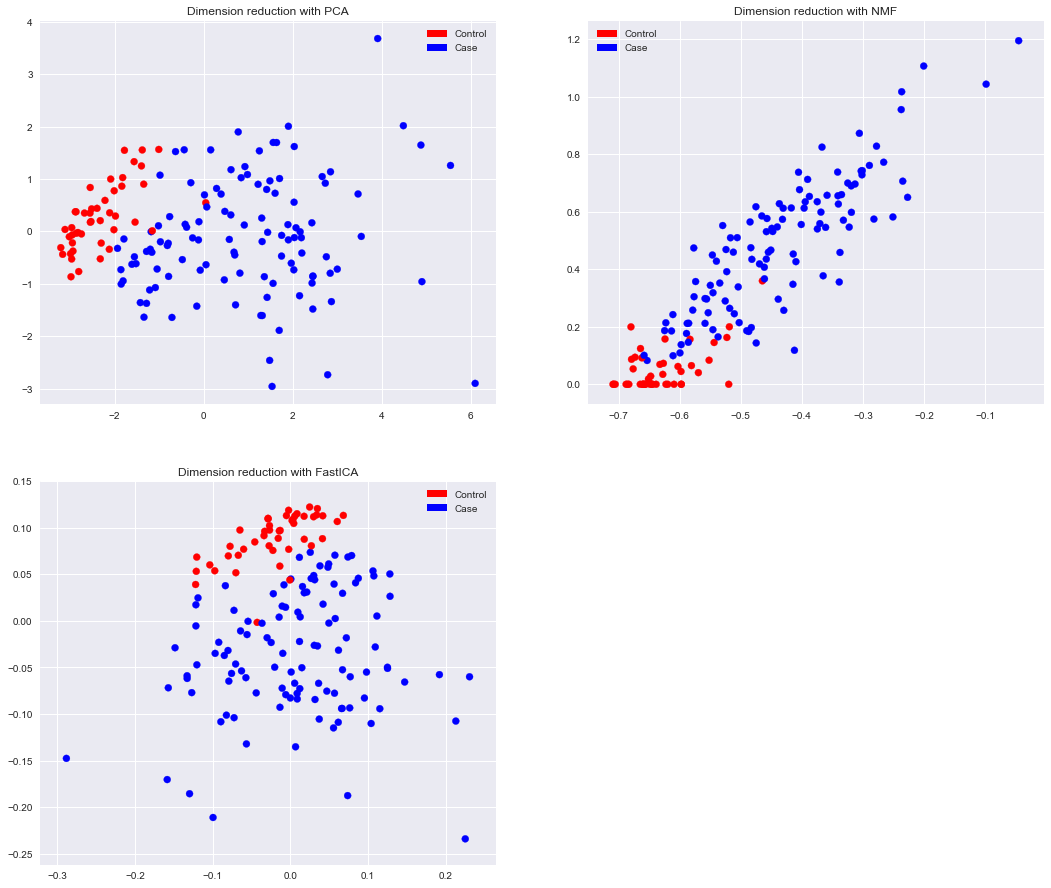

In [49]:
# plot the dimension reduction color makrked with participants' "categories", and "gender"
%matplotlib inline
plt.figure(1, figsize=(18, 24))

## PCA 
plt.subplot(3,2,1)
colors_categories = pd.concat([M_W, data_visits["info"].CASE], axis=1).CASE.replace(['Control', 'Case'], ['red', 'blue'])

plot_1 = plt.scatter(M_W[['PCA_1']], M_W[['PCA_2']], c = colors_categories)

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
plt.legend((p1, p2), ('Control', 'Case'), loc='best');
plt.title('Dimension reduction with PCA')


## NMF 
plt.subplot(3,2,2)

plot_1 = plt.scatter(-M_W[['NMF_2_1']], M_W[['NMF_2_2']], c = colors_categories)

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
plt.legend((p1, p2), ('Control', 'Case'), loc='best');
plt.title('Dimension reduction with NMF')
# plt.plot([0.3,0.6], [0,0.5])
# plt.plot([0.2,0.5], [0.1,0.6])

## ICA
plt.subplot(3,2,3)

plot_1 = plt.scatter(M_W[['ICA_1']], M_W[['ICA_2']], c = colors_categories)

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
plt.legend((p1, p2), ('Control', 'Case'), loc='best');
plt.title('Dimension reduction with FastICA')



## 7. Visualization of progression space in 3D

<IPython.core.display.Javascript object>


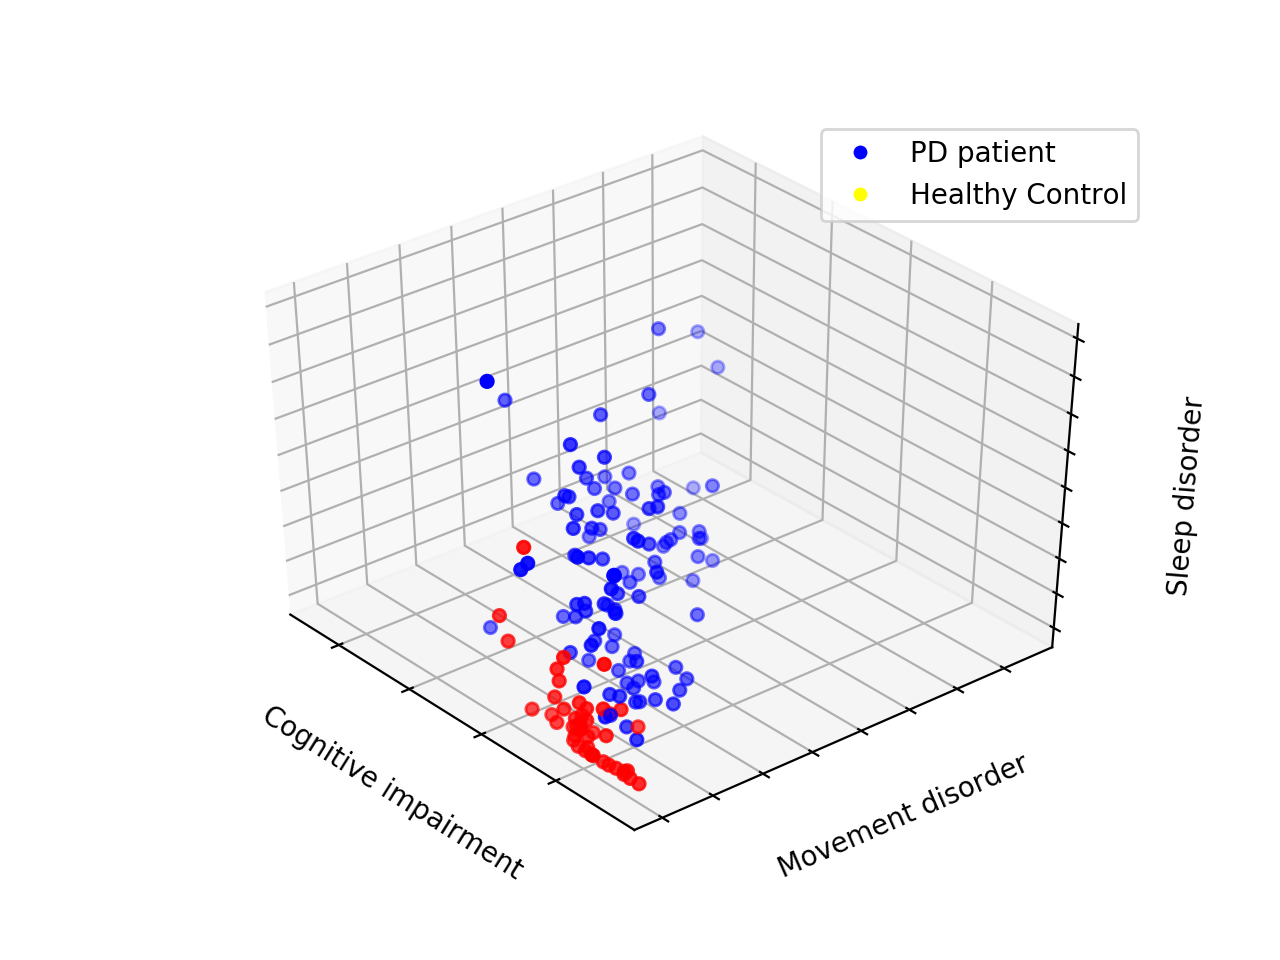

In [207]:
# NMF 3 color makrked with participants' "categories"
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

# plots all
# ax.scatter(M_W[['NMF_3_1']], M_W[['NMF_3_2']], M_W[['NMF_3_3']], c = colors_categories)
# plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');

# plots onlt PD and HC
M_W_PD_HC = M_W.loc[ M_cat.CASE.isin(['Control', 'Case']) ]
ax.scatter(M_W_PD_HC[['NMF_3_1']], M_W_PD_HC[['NMF_3_2']], M_W_PD_HC[['NMF_3_3']], c = colors_categories[ M_cat.CASE.isin(['Control', 'Case']) ])
plt.legend((p2, p1), ('PD patient','Healthy Control' ), loc='best');

ax.grid(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Cognitive impairment')
ax.set_ylabel('Movement disorder')
ax.set_zlabel('Sleep disorder')

## 8. Bring in PPMI  GMM 

In [55]:
# label HC as HC
M_label_columns = ['GMM']
M_label = pd.DataFrame(index=M_chosen.index, columns=M_label_columns)

M_label[ M_cat.CASE == "Control" ] = 'Control'


%store -r model_gmm
M_W_PD_chosen = M_W_PD_HC[M_cat.CASE == "Case"]

M_label.loc[ M_cat.CASE == "Case", 'GMM' ] = model_gmm.predict(M_W_PD_chosen[['NMF_2_1', 'NMF_2_2']])
M_label.replace([1,0,2],['PD_l', 'PD_m', 'PD_h'], inplace=True)
M_label.head()

GMM
PATNO              
PDAA503EF5     PD_h
PDAB411CTU  Control
PDAC066ZP4  Control
PDAG669PAY  Control
PDBB602VX6     PD_l

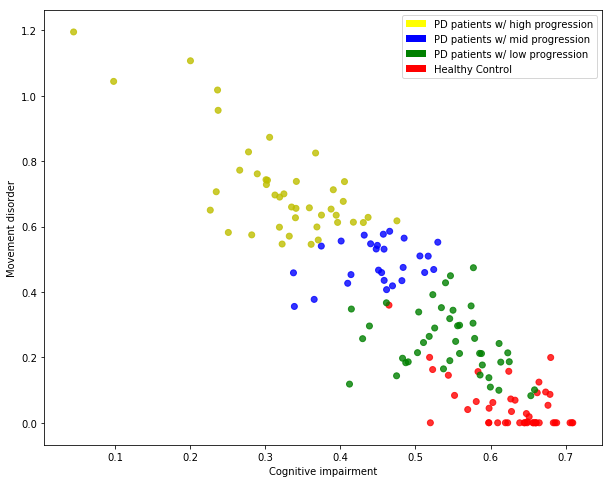

In [210]:
# plot only predicted PD
%matplotlib inline

plt.figure(1, figsize=(10, 8))
colors = ['r' if i=='Control' else 'g' if i=='PD_l' else 'b' if i=='PD_m' else 'y' if i=='PD_h' else 'black' for i in M_label['GMM']]
ax = plt.scatter(M_W_PD_HC[['NMF_2_1']], M_W_PD_HC[['NMF_2_2']], c=colors, alpha=0.8)#gca()
# ax.scatter(M_PD_HC_gmm_chosen[[0]], M_PD_HC_gmm_chosen[[1]], c=colors, alpha=0.8)
p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
plt.legend((p1, p2, p3, p4), ('PD patients w/ high progression', 'PD patients w/ mid progression', 'PD patients w/ low progression', 'Healthy Control'), loc='best');
# plt.title('Adding HC to the labeld PD')
# plt.axes().set_xticklabels([])
# plt.axes().set_yticklabels([])
plt.axes().set_xlabel('Cognitive impairment')
plt.axes().set_ylabel('Movement disorder')
# ax.set_zlabel('Sleep disorder')

## 8. Bring in PPMI dataset

In [208]:
%store -r M_PD_HC_gmm_chosen
M_label_PD_HC = pd.read_csv("../M_label_PD_HC.csv", index_col='PATNO')
M_nmf_PD_HC = pd.read_csv("../M_nmf_PD_HC.csv", index_col='PATNO')
M_nmf_PD_HC.columns = ['NMF_3_1', 'NMF_3_2', 'NMF_3_3']

ppmi_pdbp_nmf3d = pd.concat([M_nmf_PD_HC, M_W_PD_HC[['NMF_3_1', 'NMF_3_2', 'NMF_3_3']]])
ppmi_pdbp_nmf2d = pd.concat([M_PD_HC_gmm_chosen, M_W_PD_HC[['NMF_2_1', 'NMF_2_2']]])

ppmi_pdbp_label = pd.concat([M_label_PD_HC, M_cat.CASE.to_frame("GMM")])
ppmi_pdbp_label_gmm = pd.concat([M_label_PD_HC, M_label.replace(['PD_l', 'PD_m', 'PD_h'], ['PD_l_pdbp', 'PD_m_pdbp', 'PD_h_pdbp'])])

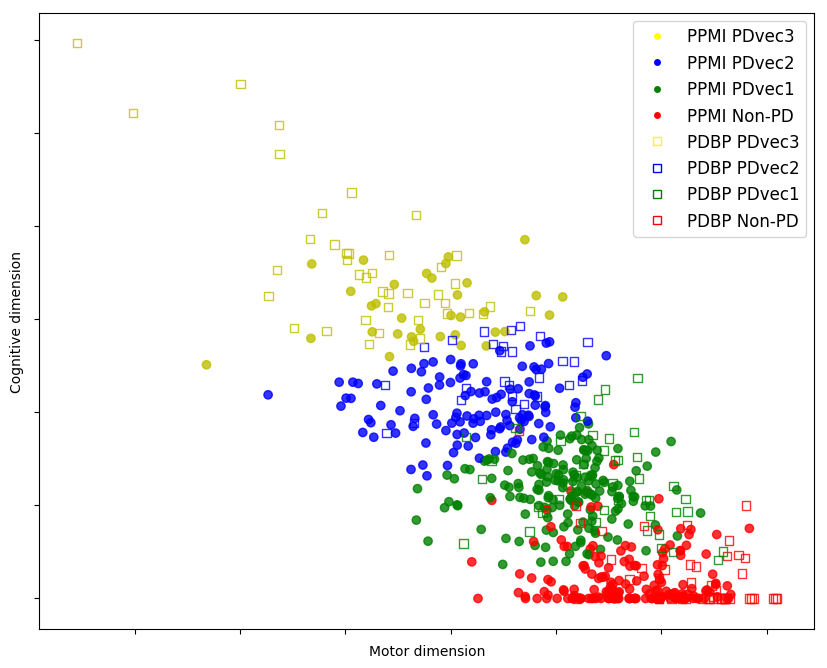

In [209]:

# plot only predicted PD
%matplotlib inline
import matplotlib as mpl
mpl.style.use('default')

plt.figure(1, figsize=(10, 8))
colors_ppmi = ['r' if i in ['HC','Control'] else 'g' if i in ['PD_l', 'PD_l_pdbp'] 
          else 'b' if i in ['PD_m', 'PD_m_pdbp'] else 
          'y' if i in ['PD_h', 'PD_h_pdbp'] else 'black' for i in M_label_PD_HC['GMM']]

colors_pdbp = ['r' if i in ['HC','Control'] else 'g' if i in ['PD_l', 'PD_l_pdbp'] 
          else 'b' if i in ['PD_m', 'PD_m_pdbp'] else 
          'y' if i in ['PD_h', 'PD_h_pdbp'] else 'black' for i in M_label['GMM']]

# ax = plt.scatter(-ppmi_pdbp_nmf2d[['NMF_2_1']], ppmi_pdbp_nmf2d[['NMF_2_2']], c=colors, marker=markers, alpha=0.8)#gca()
ax = plt.scatter(M_PD_HC_gmm_chosen[['NMF_2_1']], M_PD_HC_gmm_chosen[['NMF_2_2']], c=colors_ppmi, alpha=0.8)#gca()
ax = plt.scatter(-0.1+M_W_PD_HC[['NMF_2_1']], M_W_PD_HC[['NMF_2_2']], facecolors="None", edgecolors=colors_pdbp, marker='s', alpha=0.8)#gca()

# ax.scatter(M_PD_HC_gmm_chosen[[0]], M_PD_HC_gmm_chosen[[1]], c=colors, alpha=0.8)
p1 = plt.Line2D(range(2), range(2), color="white", marker='o', markerfacecolor="yellow")
p2 = plt.Line2D(range(2), range(2), color="white", marker='o', markerfacecolor="blue")
p3 = plt.Line2D(range(2), range(2), color="white", marker='o', markerfacecolor="green")
p4 = plt.Line2D(range(2), range(2), color="white", marker='o', markerfacecolor="red")
p5 = plt.Line2D(range(2), range(2), color="white", marker='s', markerfacecolor="None", markeredgecolor="yellow")
p6 = plt.Line2D(range(2), range(2), color="white", marker='s', markerfacecolor="None", markeredgecolor="blue")
p7 = plt.Line2D(range(2), range(2), color="white", marker='s', markerfacecolor="None", markeredgecolor="green")
p8 = plt.Line2D(range(2), range(2), color="white", marker='s', markerfacecolor="None", markeredgecolor="red")
plt.legend((p1, p2, p3, p4, p5, p6, p7, p8), 
           ('PPMI PDvec3', 'PPMI PDvec2', 'PPMI PDvec1', 'PPMI Non-PD', 'PDBP PDvec3', 'PDBP PDvec2', 'PDBP PDvec1', 'PDBP Non-PD'), loc='best',prop={'size':12});
# plt.title('Adding HC to the labeld PD')
plt.axes().set_xticklabels([])
plt.axes().set_yticklabels([])
plt.axes().set_xlabel('Motor dimension')
plt.axes().set_ylabel('Cognitive dimension')
# ax.set_zlabel('Sleep disorder')

<IPython.core.display.Javascript object>


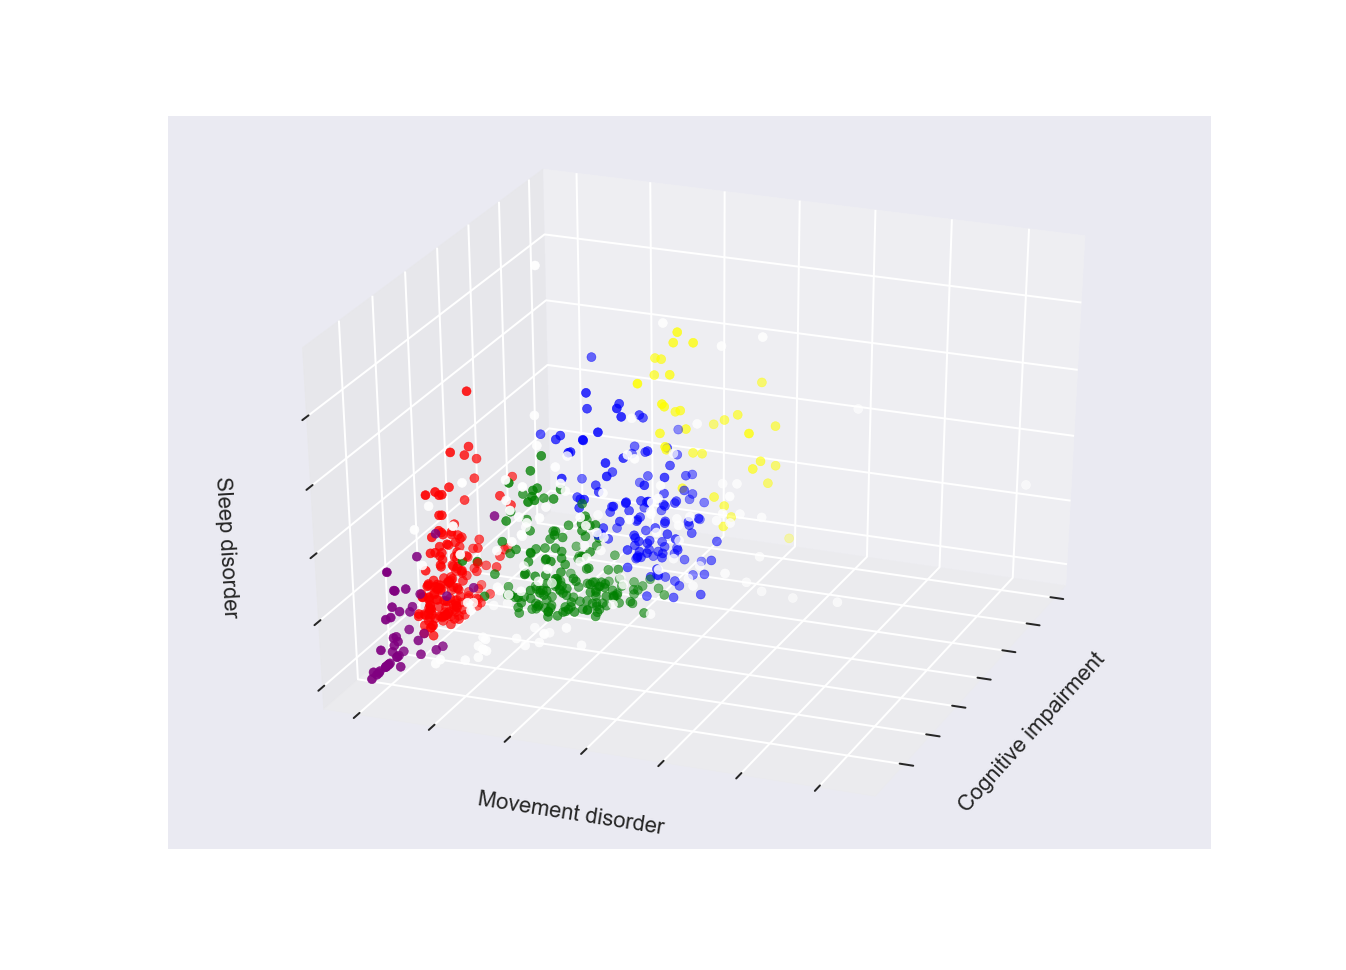

In [195]:
# NMF 3 color makrked with participants' "categories"
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

# plots all
# ax.scatter(M_W[['NMF_3_1']], M_W[['NMF_3_2']], M_W[['NMF_3_3']], c = colors_categories)
# plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');

# plots onlt PD and HC
colors_categories = ppmi_pdbp_label.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'Case', 'Control'], ['red', 'green', 'blue', 'yellow', 'white', 'purple'])
ax.scatter(ppmi_pdbp_nmf[['NMF_3_1']], ppmi_pdbp_nmf[['NMF_3_2']], ppmi_pdbp_nmf[['NMF_3_3']], c = colors_categories)



# p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
# p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
# p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
# p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
# plt.legend((p1, p2, p3, p4), ('PD patients w/ high progression', 'PD patients w/ mid progression', 'PD patients w/ low progression', 'Healthy Control'), loc='best');

ax.grid(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Cognitive impairment')
ax.set_ylabel('Movement disorder')
ax.set_zlabel('Sleep disorder')

## 9. Bringing in PPMI prediction model on NMF3D

In [211]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

%store -r clf_replication

M_W_baseline = pd.DataFrame(index=M_chosen.index, columns=M_W_columns)

M_W_baseline[['NMF_2_1', 'NMF_2_2']] = model_NMF.fit_transform(M_chosen.ix[:, M_chosen.columns.get_level_values(1)=='Baseline'] )
M_W_baseline[['NMF_3_1', 'NMF_3_2', 'NMF_3_3']] = model_NMF3.fit_transform(M_chosen.ix[:, M_chosen.columns.get_level_values(1)=='Baseline'] )
M_W_PD_HC_baseline = M_W_baseline.loc[ M_cat.CASE.isin(['Control', 'Case']) ]
M_W_PD_HC_baseline[['NMF_3_1']] = -0.0+M_W_PD_HC_baseline[['NMF_3_1']] #regularization 


X_test = M_W_PD_HC_baseline.loc[M_cat.CASE == "Case", ['NMF_3_1', 'NMF_3_2', 'NMF_3_3']]
Y_test = M_label[ M_cat.CASE == "Case" ].replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])


# print(accuracy_score(Y_test, clf_replication.predict(X_test)))



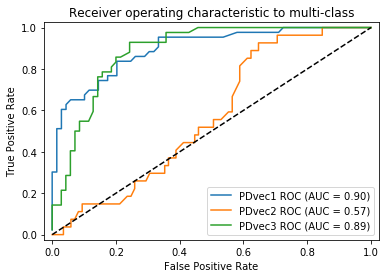

In [180]:
# plot ROC
# ref: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
%matplotlib inline


from sklearn import metrics 
n_classes = len(Y_test['GMM'].unique())
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    preds = clf_replication.predict_proba(X_test)[:,i]
    label = [1 if int(j) == (i+2) else 0 for j in Y_test['GMM']] #2,3,4
    fpr[i], tpr[i], _ = metrics.roc_curve(label, preds)
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    class_name = 'PDvec1' if i+2==2 else 'PDvec2' if i+2==3 else 'PDvec3' if i+2==4 else 'SWEDD' if i+2==5 else 'NA'
    plt.plot(fpr[i], tpr[i], label='{0} ROC (AUC = {1:0.2f})'
                                   ''.format(class_name, roc_auc[i]))

# Compute micro-average ROC curve and ROC area
# y_score = lr.predict(X_test)
# fpr["micro"], tpr["micro"], _ = metrics.roc_curve(Y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(1, figsize=(9, 5))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.025, 1.025])
plt.ylim([-0.025, 1.025])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()